## 关联 （Correlation）

关联图表用于可视化2个或更多变量之间的关系。 也就是说，一个变量如何相对于另一个变化。

###  散点图（Scatter plot）

散点图是用于研究两个变量之间关系的经典的和基本的图表。 如果数据中有多个组，则可能需要以不同颜色可视化每个组。 在 matplotlib 中，您可以使用 plt.scatterplot（） 方便地执行此操作。

#### 导入需要的绘图库

In [3]:
import numpy as np              # 导入numpy库
import pandas as pd             # 导入pandas库
import matplotlib as mpl        # 导入matplotlib库
import matplotlib.pyplot as plt 
import seaborn as sns           # 导入seaborn库

#### 设定图像各种属性

In [5]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,     #子图上的标题字体大小
          'legend.fontsize': med,      #图例的字体大小
          'figure.figsize': (16, 10),  #图像的画布大小
          'axes.labelsize': med,       #标签的字体大小
          'xtick.labelsize': med,      #x轴上的标尺的字体大小
          'ytick.labelsize': med,      #y轴上的标尺的字体大小
          'figure.titlesize': large}   #整个画布的标题字体大小
plt.rcParams.update(params)            #更新默认属性
plt.style.use('seaborn-whitegrid')     #设定整体风格
sns.set_style("white")                 #设定整体背景风格

#### 测试版本

In [6]:
print(mpl.__version__)
print(sns.__version__)
print(np.__version__)
print(pd.__version__)

3.1.0
0.9.0
1.16.4
0.24.2


### 程序代码

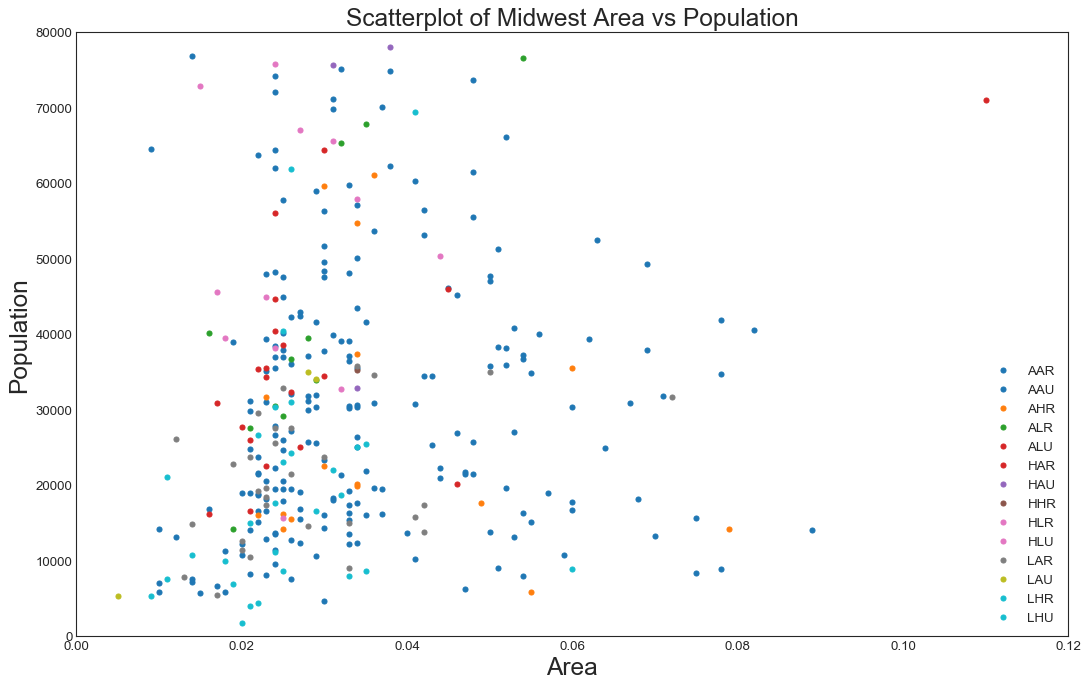

In [7]:
# step1:导入数据
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# step2:准备数据和颜色
categories = np.unique(midwest['category'])      # 使用np.unique对“midwest['category']” 去重
colors = [plt.cm.tab10(i/float(len(categories) - 1)) for i in range(len(categories))]  # 使用列表推导式，建立colors列表。

# step3:建立画布
           
plt.figure(figsize = (16, 10),     # 绘图尺寸，默认为（6.4,4.8）
            dpi = 80,              # 图像的分辨率，默认dpi为100
            facecolor = 'w',       # 背景颜色，默认为白色
            edgecolor = 'k' )      
          
# step4:绘图
    # 使用函数enumerate：将可遍历的数据对象组合为一个索引序列，同时列出数据和数据索引
for i, category in enumerate(categories):
                
    plt.scatter("area", "poptotal",                                 # 横坐标名称，纵坐标名称
                data = midwest.loc[midwest.category == category,:], # 程序会自动的从data提取data中"area"和"poptotal"数据
                s = 20,                                             # 数据点尺寸
                c = np.array(colors[i]).reshape(1, -1),             # 设定颜色，若不转换为二维，会出现报错
                label = str(category))                              # 设定标签名称
               
# step5:装饰
   
plt.gca().set(xlim = (0, 0.12), ylim=(0, 80000))   # 设定横轴坐标的范围（元组）
plt.xticks(fontsize = 12)                          # 设定x坐标轴上字体的大小
plt.yticks(fontsize = 12)                          # 设定y坐标轴上字体的大小
plt.ylabel('Population', fontsize = 22)            # 设定y坐标轴上的标题和字体大小
plt.xlabel("Area", fontsize = 22)                  # 设定x坐标轴上的标题和字体大小
plt.title("Scatterplot of Midwest Area vs Population", fontsize = 22) # 设定整个图像的标题和字体大小
plt.legend(fontsize = 12)                          # 设定图例的字体大小
plt.show()

### 博文总结

#### 创建画布
- plt.figure()

#### 参数说明
- figsize__画布尺寸
- dpi__分辨率
- facecolor__背景颜色，默认为白色
- edgecolor__边框颜色，默认为白色 

#### 绘制散点图函数
- plt.scatter()

#### 参数说明
- x__指定x轴数据（或者输入x轴数据名称）
- y__指定y轴数据（或者输入y轴数据名称）
- s__点的尺寸
- alpha__点的透明度
- linewidths__散点边框点的宽度
- edgecolors__散点边框的颜色
- cmap__指定散点的颜色映射，会使用不同颜色来区分散点的值

#### 光谱
- plt.cm.tab10()

#### plt.cm.tab10()
- 光谱网站：https://matplotlib.org/tutorials/colors/colormaps.html
- 可在plt.cm.tab10()中输入任意浮点数，进行返回颜色

#### enumerate
- enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
- 可用[*]打开惰性数据

#### 列表推导式
- 列表推导式（又称列表解析式）提供了一种简明扼要的方法来创建列表。
- 它的结构是在一个中括号里包含一个表达式，然后是一个for语句，然后是 0 个或多个 for 或者 if 语句。那个表达式可以是任意的，意思是你可以在列表中放入任意类型的对象。返回结果将是一个新的列表，在这个以 if 和 for 语句为上下文的表达式运行完成之后产生。
- 列表推导式的执行顺序：各语句之间是嵌套关系，左边第二个语句是最外层，依次往右进一层，左边第一条语句是最后一层。
- colors = [plt.cm.tab10(i/float(len(categories) - 1)) for i in range(len(categories))]